```
  _________ ____________  ___
 /   _____//  _____/\   \/  /
 \_____  \/   \  ___ \     / 
 /        \    \_\  \/     \ 
/_________/\________/___/\  \
                          \_/
```

**SGX** (the e**X**tended **S**elfish **G**ene): A quick 'n dirty versatile population-less evolutionary optimizer loosely inspired by a cool interpretation of the Darwinian theory. More info at https://github.com/squillero/sgx

In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import seaborn as sns

import sgx
import randy
import matplotlib.pyplot as plt

<ipython-input-2-1f90819283de>:4: RuntimeWarning: All debug checks are active, performances are significantly impaired.
  import sgx


In [3]:
a = sgx.allele.FloatingPoint(-1, 1, mixture_size=10)
# a.describe()
#genome = sgx.t.Genome([])

In [4]:
def plot_allele(allele):
    x = np.linspace(allele._interval[0], allele._interval[1], 100)
    y = np.zeros(x.shape)
    for f in allele._mixture:
        pdf = randy.get_rvs(f.a, f.b, f.loc, f.scale)
        t = pdf(x)
        plt.plot(x, t, ',')
        y += t / len(allele._mixture)
    plt.plot(x, y, 'k-', lw=2)
    plt.show()

def plot_genome(genome):
    x = np.linspace(genome[0]._interval[0], genome[0]._interval[1], 100)
    for allele in genome:
        y = np.zeros(x.shape)
        for f in allele._mixture:
            pdf = randy.get_rvs(f.a, f.b, f.loc, f.scale)
            y += pdf(x) / len(allele._mixture)
        plt.plot(x, y)
    plt.ylim([0, 1])
    plt.show()

In [5]:
def plot_allele_dist(allele):
    SAMPLES = 10_000
    r = [allele.sample() for _ in range(SAMPLES)]
    sns.histplot(r, bins=50)

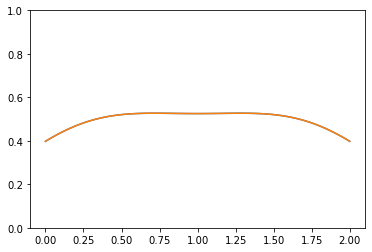

In [9]:
DIMENSIONS = 2
from scipy.optimize import rosen

fitness_function = sgx.fitness.FitnessFunction(lambda i: rosen(i), 
                                               type_=sgx.fitness.reversed(sgx.fitness.Scalar))
                                        
genome = sgx.t.Genome([sgx.allele.FloatingPoint(0, 2) for _ in range(DIMENSIONS)])
species = sgx.t.Species(genome=genome, fitness_function=fitness_function)
plot_genome(genome)

0%|          |? (?gen/s)

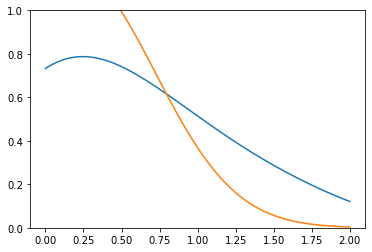

In [10]:
archive = sgx.algorithms.sg(species, max_generation=20_000, random_seed=1)
plot_genome(genome)